In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import PIL
import matplotlib.pyplot as plt
import json
from IPython.display import Image as disp_image 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data_dir = '/content/drive/My Drive/DR_Messidor_Dataset'
img_height = 256
img_width = 256
batch_size = 32
channels = 3

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

In [ ]:
model = tf.keras.applications.InceptionV3(weights = "imagenet", include_top=False, 
input_shape = (img_width, img_height, channels))

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers[:-5]:
    layer.trainable = False

top_model = Sequential()
top_model.add(model)
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

print(model.summary())
print(top_model.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
top_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6),
                  metrics=METRICS)

history = top_model.fit(
          train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=18,
          validation_data=validation_generator,
          validation_steps=validation_generator.n // batch_size)

Epoch 1/18
 65/180 [=========>....................] - ETA: 7:12 - loss: 0.2749 - accuracy: 0.9558 - precision: 0.9608 - recall: 0.9556 - auc: 0.9817

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


180/180 [==============================] - 947s 5s/step - loss: 0.1897 - accuracy: 0.9699 - precision: 0.9724 - recall: 0.9708 - auc: 0.9866 - val_loss: 0.0324 - val_accuracy: 0.9937 - val_precision: 0.9896 - val_recall: 0.9987 - val_auc: 0.9984
Epoch 2/18
180/180 [==============================] - 164s 907ms/step - loss: 0.0682 - accuracy: 0.9866 - precision: 0.9882 - recall: 0.9866 - auc: 0.9950 - val_loss: 0.0617 - val_accuracy: 0.9924 - val_precision: 0.9947 - val_recall: 0.9908 - val_auc: 0.9950
Epoch 3/18
180/180 [==============================] - 166s 920ms/step - loss: 0.0897 - accuracy: 0.9892 - precision: 0.9892 - recall: 0.9905 - auc: 0.9939 - val_loss: 0.0363 - val_accuracy: 0.9944 - val_precision: 0.9961 - val_recall: 0.9934 - val_auc: 0.9985
Epoch 4/18
180/180 [==============================] - 164s 912ms/step - loss: 0.0384 - accuracy: 0.9946 - precision: 0.9941 - recall: 0.9957 - auc: 0.9977 - val_loss: 0.0711 - val_accuracy: 0.9924 - val_precision: 0.9934 - val_recall:

In [ ]:
print('\nEpoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy')
Epochs = 18
for i in range(Epochs):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['loss'][i], history.history['accuracy'][i], history.history['val_loss'][i], history.history['val_accuracy'][i]))


Epoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy
       1   0.189713 	   0.969950 	   0.032354 	   0.993750
       2   0.068161 	   0.986625 	   0.061741 	   0.992361
       3   0.089726 	   0.989231 	   0.036337 	   0.994444
       4   0.038439 	   0.994615 	   0.071148 	   0.992361
       5   0.042556 	   0.994268 	   0.084080 	   0.993750
       6   0.058773 	   0.994789 	   0.130197 	   0.988194
       7   0.041168 	   0.994094 	   0.092773 	   0.992361
       8   0.039294 	   0.994789 	   0.094447 	   0.988889
       9   0.053935 	   0.993399 	   0.131762 	   0.991667
      10   0.026517 	   0.997221 	   0.096154 	   0.995833
      11   0.037467 	   0.996873 	   0.079110 	   0.995833
      12   0.026985 	   0.997395 	   0.102200 	   0.995833
      13   0.020448 	   0.996352 	   0.094547 	   0.993056
      14   0.023632 	   0.997742 	   0.091723 	   0.995139
      15   0.013689 	   0.998263 	   0.099194 	   0.993750
      16   0.011378 	   0.998784 	   0.09911

In [ ]:
score = top_model.evaluate(validation_generator)
f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print("\n","Loss: ", score[0],"\n", "Accuracy: ", score[1],"\n", "Precision: ",score[2], "\n","Recall: ",score[3],"\n","F1-Score: ",f1_score,"\n","AUC: ",score[4])

46/46 [==============================] - 33s 712ms/step - loss: 0.1061 - accuracy: 0.9945 - precision: 0.9961 - recall: 0.9935 - auc: 0.9959

 Loss:  0.10613024979829788 
 Accuracy:  0.9944674968719482 
 Precision:  0.9960681796073914 
 Recall:  0.9934640526771545 
 F1-Score:  0.9947644118529534 
 AUC:  0.9958979487419128


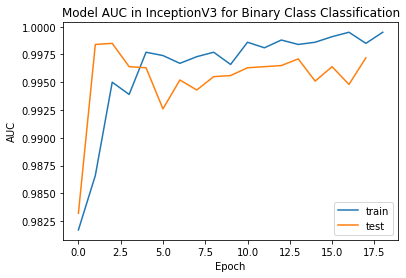

In [ ]:
import matplotlib.pyplot as plt
auc = [0.9817,0.9866,0.9950,0.9939,0.9977,0.9974,0.9967,0.9973,0.9977,0.9966,0.9986,0.9981,0.9988,0.9984,0.9986,0.9991,0.9995,0.9985,0.9995]
val_auc = [0.9832,0.9984,0.9985,0.9964,0.9963,0.9926,0.9952,0.9943,0.9955,0.9956,0.9963,0.9964,0.9965,0.9971,0.9951,0.9964,0.9948,0.9972]
plt.title('Model AUC in InceptionV3 for Binary Class Classification')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.plot(auc, label='train')
plt.plot(val_auc, label='test')
plt.legend()
plt.show()


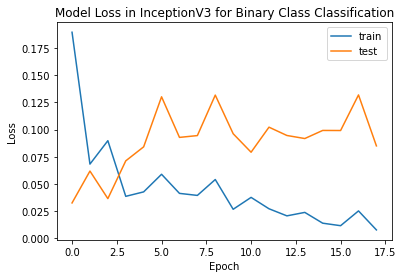

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Model Loss in InceptionV3 for Binary Class Classification')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/LossNASNetMobile.png')
pyplot.legend()
pyplot.show()

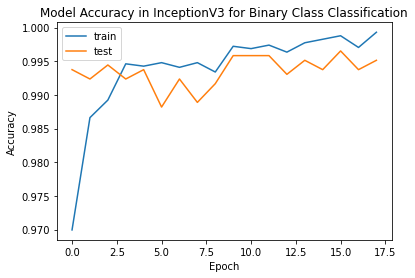

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Model Accuracy in InceptionV3 for Binary Class Classification')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/AccuracyNASNetMobile.png')
pyplot.legend()
pyplot.show()